# DBSCAN

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# --- 1. Carregar e Preparar o Dataset Iris ---
iris = load_iris()
data = iris.data
labels_true = iris.target

print("Formato dos dados Iris:", data.shape)
print("Primeiras 5 linhas dos dados:\n", data[:5])

# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data = data_scaled

# --- 2. Funções Auxiliares para o DBSCAN ---

def euclidean_distance(point1, point2):
    """Calcula a distância euclidiana entre dois pontos."""
    return np.sqrt(np.sum((point1 - point2)**2))

def get_neighbors(data, point_index, eps):
    """
    Encontra todos os pontos dentro da vizinhança 'eps' de um dado ponto.
    Retorna uma lista de índices dos vizinhos.
    """
    neighbors = []
    ref_point = data[point_index]
    for i, p in enumerate(data):
        if i == point_index:
            continue
        if euclidean_distance(ref_point, p) <= eps:
            neighbors.append(i)
    return neighbors

# --- 3. Função Principal do DBSCAN ---

def dbscan(data, eps, minPts):
    """
    Implementação do algoritmo DBSCAN.

    Args:
        data (np.array): O conjunto de dados a ser agrupado.
        eps (float): O raio máximo da vizinhança.
        minPts (int): O número mínimo de pontos para formar uma densidade.

    Returns:
        np.array: Um array com os rótulos de cluster para cada ponto.
                  -1 indica ruído.
                  Clusters são numerados a partir de 0.
    """
    n_points = len(data)
    labels = np.full(n_points, -2) # -2 significa 'não visitado'
    cluster_id = 0

    for i in range(n_points):
        if labels[i] != -2:
            continue

        neighbors = get_neighbors(data, i, eps)

        if len(neighbors) < minPts:
            labels[i] = -1 # Marcar como ruído
        else:
            # Ponto é um core point, comece a expandir um novo cluster
            expand_cluster(data, labels, i, neighbors, cluster_id, eps, minPts)
            cluster_id += 1

    return labels

def expand_cluster(data, labels, point_index, neighbors_of_core_point, cluster_id, eps, minPts):
    """
    Expande um cluster a partir de um ponto central.
    """
    labels[point_index] = cluster_id
    queue = list(neighbors_of_core_point)

    head = 0
    while head < len(queue):
        current_point_idx = queue[head]
        head += 1

        if labels[current_point_idx] >= 0: # Se já pertence a um cluster, pule
            continue

        if labels[current_point_idx] == -1: # Se era ruído, reclassifica para borda
            labels[current_point_idx] = cluster_id
            continue # Pontos de borda não expandem o cluster

        labels[current_point_idx] = cluster_id # Atribui ao cluster

        current_neighbors = get_neighbors(data, current_point_idx, eps)

        if len(current_neighbors) >= minPts: # Se este ponto também é um core point
            for neighbor_idx in current_neighbors:
                if (labels[neighbor_idx] == -2 or labels[neighbor_idx] == -1) and \
                   (neighbor_idx not in queue[head:]):
                    queue.append(neighbor_idx)






Formato dos dados Iris: (150, 4)
Primeiras 5 linhas dos dados:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Cenário A


Rodando DBSCAN com Cenário A: eps=0.6, minPts=4...

--- Resultados do Agrupamento DBSCAN ---
Rótulos de cluster gerados: [-1  0  1]
Número de clusters encontrados: 2
Número de pontos de ruído: 26
Contagem de pontos por cluster:
   Pontos de Ruído (-1): 26 pontos
   Cluster 0: 46 pontos
   Cluster 1: 78 pontos


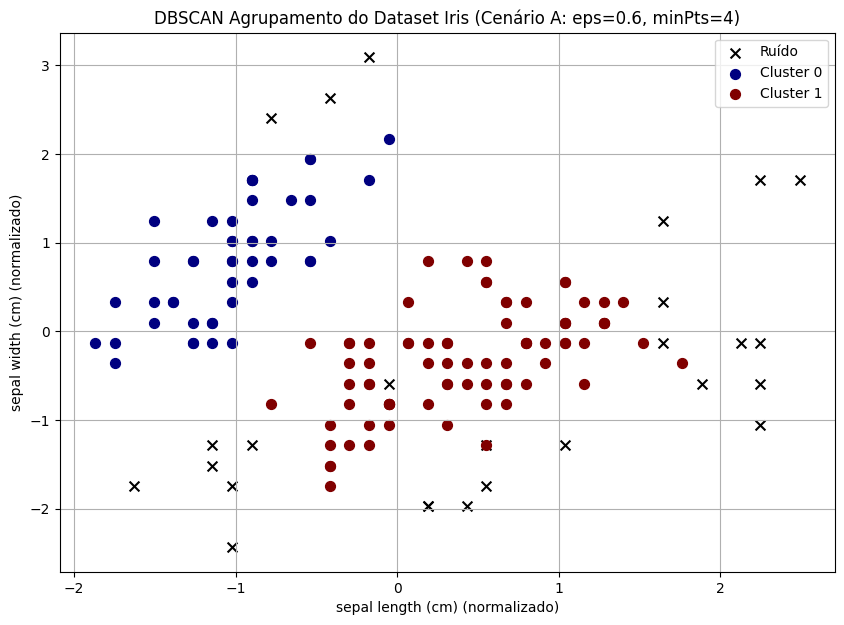

In [2]:
eps_value = 0.6
minPts_value = 4
scenario_name = "Cenário A: eps=0.6, minPts=4"


print(f"\nRodando DBSCAN com {scenario_name}...")
clusters = dbscan(data, eps_value, minPts_value)

print("\n--- Resultados do Agrupamento DBSCAN ---")
unique_clusters = np.unique(clusters)
print("Rótulos de cluster gerados:", unique_clusters)

n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
n_noise_points = np.sum(clusters == -1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de pontos de ruído: {n_noise_points}")

print("Contagem de pontos por cluster:")
for cluster_id in unique_clusters:
    if cluster_id == -1:
        print(f"   Pontos de Ruído (-1): {np.sum(clusters == cluster_id)} pontos")
    else:
        print(f"   Cluster {cluster_id}: {np.sum(clusters == cluster_id)} pontos")

plt.figure(figsize=(10, 7))

for cluster_id in unique_clusters:
    cluster_points = data[clusters == cluster_id]

    if cluster_id == -1:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c='black', marker='x', label='Ruído')
    else:
        norm_cluster_id = float(cluster_id) / (max(unique_clusters) if max(unique_clusters) != -1 else 1)
        color = plt.cm.jet(norm_cluster_id)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], label=f'Cluster {cluster_id}')

plt.title(f'DBSCAN Agrupamento do Dataset Iris ({scenario_name})')
plt.xlabel(iris.feature_names[0] + ' (normalizado)')
plt.ylabel(iris.feature_names[1] + ' (normalizado)')
plt.legend()
plt.grid(True)
plt.show()



## Cenário B


Rodando DBSCAN com Cenário B: eps=0.8, minPts=5...

--- Resultados do Agrupamento DBSCAN ---
Rótulos de cluster gerados: [-1  0  1]
Número de clusters encontrados: 2
Número de pontos de ruído: 4
Contagem de pontos por cluster:
   Pontos de Ruído (-1): 4 pontos
   Cluster 0: 49 pontos
   Cluster 1: 97 pontos


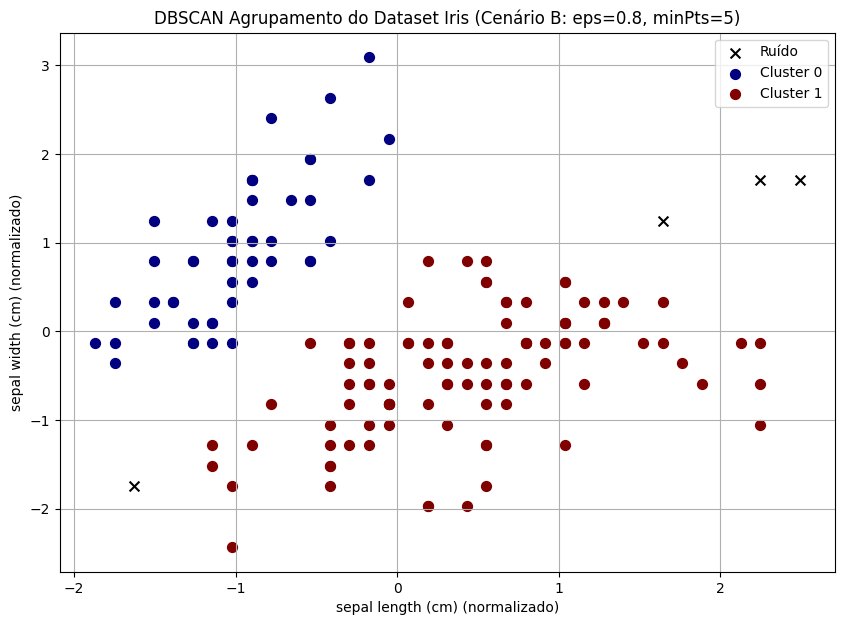

In [3]:
eps_value = 0.8
minPts_value = 5
scenario_name = "Cenário B: eps=0.8, minPts=5"

print(f"\nRodando DBSCAN com {scenario_name}...")
clusters = dbscan(data, eps_value, minPts_value)

print("\n--- Resultados do Agrupamento DBSCAN ---")
unique_clusters = np.unique(clusters)
print("Rótulos de cluster gerados:", unique_clusters)

n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
n_noise_points = np.sum(clusters == -1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de pontos de ruído: {n_noise_points}")

print("Contagem de pontos por cluster:")
for cluster_id in unique_clusters:
    if cluster_id == -1:
        print(f"   Pontos de Ruído (-1): {np.sum(clusters == cluster_id)} pontos")
    else:
        print(f"   Cluster {cluster_id}: {np.sum(clusters == cluster_id)} pontos")

plt.figure(figsize=(10, 7))

for cluster_id in unique_clusters:
    cluster_points = data[clusters == cluster_id]

    if cluster_id == -1:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c='black', marker='x', label='Ruído')
    else:
        norm_cluster_id = float(cluster_id) / (max(unique_clusters) if max(unique_clusters) != -1 else 1)
        color = plt.cm.jet(norm_cluster_id)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], label=f'Cluster {cluster_id}')

plt.title(f'DBSCAN Agrupamento do Dataset Iris ({scenario_name})')
plt.xlabel(iris.feature_names[0] + ' (normalizado)')
plt.ylabel(iris.feature_names[1] + ' (normalizado)')
plt.legend()
plt.grid(True)
plt.show()
